In [1]:
import sys
sys.path.insert(0, "..")
from eis_toolkit.vector_processing.idw_interpolation import idw

import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio
import time

SMALL_RASTER = "../tests/data/remote/small_raster.tif"
POINTS = "../tests/data/remote/interpolating/interpolation_test_data_small.gpkg"

gdf = gpd.read_file(POINTS)

with rasterio.open(SMALL_RASTER) as src:
    raster_profile = src.profile

/home/mika/.cache/pypoetry/virtualenvs/eis-toolkit-l5cKD1lZ-py3.10/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
interpolated_values = idw(
    geodataframe=gdf,
    target_column='value',
    raster_profile=raster_profile,
    power=2
)

/home/mika/.cache/pypoetry/virtualenvs/eis-toolkit-l5cKD1lZ-py3.10/lib/python3.10/site-packages/geopandas/geoseries.py:643: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


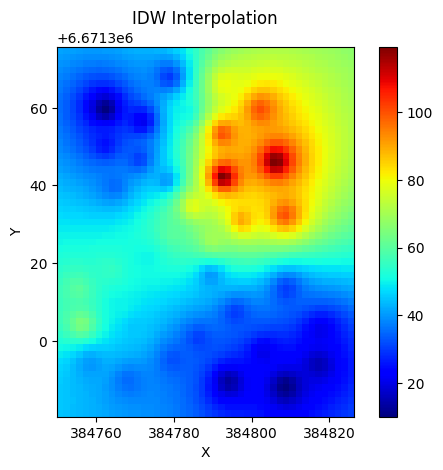

In [3]:
# Plot the interpolated values
x_min, y_min, x_max, y_max = gdf.geometry.total_bounds
plt.imshow(interpolated_values, cmap='jet', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('IDW Interpolation')
plt.show()

In [4]:
# Saves the output of the most recently executed interpolation
# As a GeoTIFF to the eis_toolkit/notebooks folder.
output_file = '../tests/data/local/results/idw_test_output.tif'

# Create a rasterio dataset for writing the GeoTIFF
with rasterio.open(output_file, 'w', driver='GTiff', width=interpolated_values.shape[1],
                   height=interpolated_values.shape[0], count=1, dtype=interpolated_values.dtype,
                   crs=gdf.crs, transform=rasterio.transform.from_bounds(x_min, y_min, x_max, y_max, interpolated_values.shape[1], interpolated_values.shape[0])) as dst:
    # Write the interpolated values to the GeoTIFF band
    dst.write(interpolated_values, 1)

print(f"Interpolated values saved as GeoTIFF: {output_file}")

Interpolated values saved as GeoTIFF: ../tests/data/local/results/idw_test_output.tif


In [5]:
interpolated_values_with_radius = idw(
    geodataframe=gdf,
    target_column='value',
    raster_profile=raster_profile,
    power=2,
    search_radius=50,
)

/home/mika/.cache/pypoetry/virtualenvs/eis-toolkit-l5cKD1lZ-py3.10/lib/python3.10/site-packages/geopandas/geoseries.py:643: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


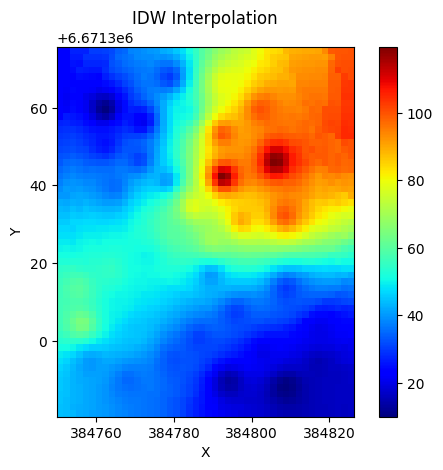

In [6]:
# Plot the interpolated values
x_min, y_min, x_max, y_max = gdf.geometry.total_bounds
plt.imshow(interpolated_values_with_radius, cmap='jet', extent=[x_min, x_max, y_min, y_max])
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('IDW Interpolation')
plt.show()

In [7]:
# Saves the output of the most recently executed interpolation
# As a GeoTIFF to the eis_toolkit/notebooks folder.
output_file = '../tests/data/local/results/idw_radius_test_output.tif'

# Create a rasterio dataset for writing the GeoTIFF
with rasterio.open(output_file, 'w', driver='GTiff', width=interpolated_values_with_radius.shape[1],
                   height=interpolated_values_with_radius.shape[0], count=1, dtype=interpolated_values_with_radius.dtype,
                   crs=gdf.crs, transform=rasterio.transform.from_bounds(x_min, y_min, x_max, y_max, interpolated_values_with_radius.shape[1], interpolated_values_with_radius.shape[0])) as dst:
    # Write the interpolated values to the GeoTIFF band
    dst.write(interpolated_values_with_radius, 1)

print(f"Interpolated values saved as GeoTIFF: {output_file}")

Interpolated values saved as GeoTIFF: ../tests/data/local/results/idw_radius_test_output.tif
